# <span style="color: blue">Funções de perda</span>

Para saber se estamos chegando próximos de uma solução é necessária uma métrica que avalie a qualidade dessa aproximação. O objetivo é **minimizar**/**máximizar** algo. De alguma maneira, nossa rede precisa entender o gasto para uma determinada ação e por esse motivo também pode ser chamada de <span style="color: blue">função custo</span>.
> "A função custo reduz todos os aspectos bons e ruins de um sistema complexo **a um único número**, um valor escalar, o que permite rankear e comparar as soluções candidatas" - (_Neural Smithing: Supervised Learning in Feedforward Artificial Neural Networks_)

Ou seja, se tratando de <span style="color: blue">função de perda</span> estamos falando de **um único número**. Se queremos, por exemplo, minimizar uma distância mas também máximizar uma força precisamos resumir esses 2 critérios em **um único escalar**. 
> "Se fizermos uma escolha ruim de função de custo e os resultados obtidos não forem satisfatórios, é nossa culpa por não especificar bem o objetivo" - (_Neural Smithing: Supervised Learning in Feedforward Artificial Neural Networks_)

## Exemplos
### Regressão
<img src="figures/loss_func_example.png">
<br>
<br>

### Classificação
<img src="figures/loss_func_example2.png">

No caso de classificação com múltiplas classes, usamos a <span style="color: blue">Cross-Entropy</span> onde o objetivo é **minimizar** a entropia das distribuições.

<img src="figures/cross_entropy1.png" class="col-md-6" style="width: 450px; height: 300px">
<img src="figures/cross_entropy2.png" class="col-md-6" style="width: 450px; height: 300px">


## <span style="color: blue">Convergência de Modelos</span>

- Ao treinar um modelo, o objetivo é fazê-lo **convergir** para uma solução aproximadamente ótima.
- A função de perda é utilizada para acompanhar essa **convergência**

## No Pytorch

### Classificação

In [1]:
import torch

from torch   import nn
from sklearn import datasets

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [3]:
wine = datasets.load_wine()

data = wine.data
target = wine.target

In [4]:
data.shape

(178, 13)

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
target.shape

(178,)

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [9]:
target[0]

0

#### Instanciando MLP

In [10]:
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WineClassifier, self).__init__()
        
        self.hidden  = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        self.out     = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()
    
    def forward(self, X):
        feature = self.relu(self.hidden(X))
        output  = self.softmax(self.out(feature))
        
        return output

In [11]:
input_size  = data.shape[1]
hidden_size = 32
output_size = len(wine.target_names)

net = WineClassifier(input_size, hidden_size, output_size).to(device)

net

WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)

In [12]:
criterion = nn.CrossEntropyLoss().to(device)

In [13]:
X_tns = torch.Tensor(data).to(device)
y_tns = torch.Tensor(target).long().to(device)

In [14]:
X_tns.dtype

torch.float32

In [15]:
y_tns.dtype

torch.int64

In [16]:
pred = net(X_tns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [17]:
y_tns.shape

torch.Size([178])

In [18]:
pred.shape

torch.Size([178, 3])

Embora estejam com dimensões diferentes, a CrossEntropy aceita os dados dessa forma.

`prediction(N, C)`

`target(N,)`

In [19]:
loss = criterion(pred, y_tns)

In [20]:
loss

tensor(1.1971, grad_fn=<NllLossBackward0>)

O valor retornado na `loss` é uma média dos valores comparados entre previsão e real 

### Regressão

In [21]:
import torch

from torch   import nn
from sklearn import datasets

In [22]:
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

In [23]:
data.shape

(442, 10)

In [24]:
target.shape

(442,)

#### Instanciando MLP

In [25]:
class DiabetesRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DiabetesRegressor, self).__init__()
        
        self.hidden  = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        self.out     = nn.Linear(hidden_size, output_size)
    
    def forward(self, X):
        feature = self.relu(self.hidden(X))
        output  = self.out(feature)
        
        return output

In [26]:
input_size  = data.shape[1]
hidden_size = 32
output_size = 1

net = DiabetesRegressor(input_size, hidden_size, output_size).to(device)

net

DiabetesRegressor(
  (hidden): Linear(in_features=10, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [27]:
criterion = nn.MSELoss().to(device)

In [28]:
X_tns = torch.Tensor(data).to(device)
y_tns = torch.Tensor(target).to(device)

In [29]:
X_tns.dtype

torch.float32

In [30]:
y_tns.dtype

torch.float32

In [31]:
pred = net(X_tns)

In [32]:
y_tns.shape

torch.Size([442])

In [33]:
pred.shape

torch.Size([442, 1])

Para `MSELoss()` os dois valores devem ter a **mesma dimensionalidade**

In [34]:
pred.squeeze().shape

torch.Size([442])

In [35]:
loss = criterion(pred.squeeze(), y_tns)

In [36]:
loss

tensor(29020.3867, grad_fn=<MseLossBackward0>)

# <span style="color: blue">Otimização</span>

Nosso objetivo é **minimizar** a função de perda. Para isso alteramos os pesos do modelo de modo **iterativo** e verificamos os impacto de cada alteração

<img src="figures/otimizacao.png">

Para saber se aumentamos ou diminuimos a **perda**, calculamos a derivada da **função de perda**. Como tratamos de múltiplas direções, o vetor de derivadas parciais é chamado de <span style="color: blue">gradiente</span>.

## Comportamento de algumas técnicas de gradientes descendente

### Batch Gradient Descent
<img src="figures/batch_gradient_descent.png" style="width: 500px">

### Stochastic Gradient Descent
<img src="figures/stochastic_gradient_descent.png" style="width: 500px">

### Mini Batch Gradient Descent
<img src="figures/minibatch_gradient_descent.png" style="width: 500px">

O **gradiente** é um indicador se uma alteração nos pesos da rede melhorou ou piorou o modelo com base na **função de perda**.

A <span style="color: blue">otimização</span> é o uso das informações advindas do **gradiente** para decidir a próxima alteração de pesos

O <span style="color: blue">Fluxo de treinamento</span> se dá, então, por:
1. Operações com o Input da rede
2. Cálculo da função de perda
3. Cálculo do gradiente
4. Atualização de pesos
5. Retorna ao passo 1

1 e 2 são caminhos de Forward. 3 e 4 são caminhos de Backward com base no resultado obtido após o passo 2, esse processo é chamado de backpropagation.

O que ocorre na atualização dos pesos é:
<br>
<br>
<center style="font-size: 26px">
    $W_i = W_i - \alpha \cdot \triangledown f_i$
</center>
<br>
<br>
Onde $\alpha$ é a <span style="color: blue">Taxa de aprendizado</span> (tamanho do passo) que é um valor que afeta diretamente na convergência do modelo.

# <span style="color: blue">Taxa de Aprendizado</span>

<img src="figures/taxa_aprendizado.png">

Ex. do Google: https://developers.google.com/machine-learning/crash-course/fitter/graph

Ex. de Stanford: http://vision.stanford.edu/teaching/cs231n-demos/linear-classify/

# No Pytorch

In [37]:
from sklearn import datasets

import matplotlib.pyplot as plt

wine = datasets.load_wine()

- Teor Alcoólico: índice 0
- Intensidade da cor: índice 9

In [38]:
features_idx = [0, 9]

data = wine.data[:, features_idx]
targets = wine.target

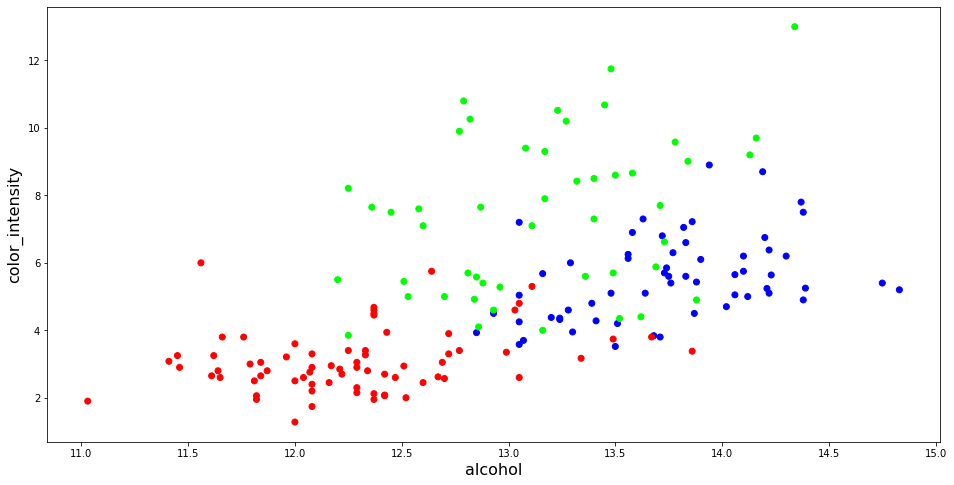

In [39]:
plt.figure(figsize=(16, 8))

plt.scatter(data[:, 0], data[:, 1], c=targets, cmap=plt.cm.brg)

plt.xlabel(wine.feature_names[features_idx[0]], fontsize=16)
plt.ylabel(wine.feature_names[features_idx[1]], fontsize=16)

plt.show()

## Normalização

Como as características variam em escalas diferentes, elas vão exercer diferentes influências sobre o nosso modelo e prejudicar a convergência. Para isso, precisamos normalizar os dados.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

data = scaler.fit_transform(data)

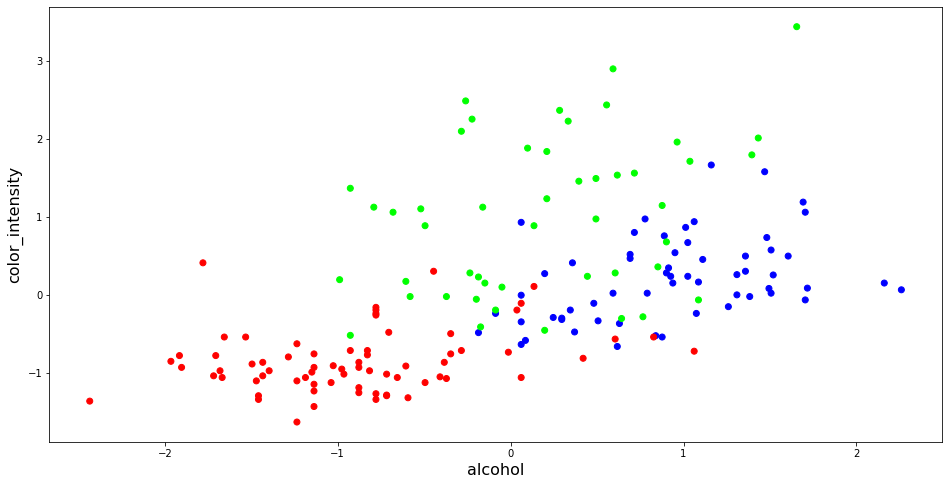

In [42]:
plt.figure(figsize=(16, 8))

plt.scatter(data[:, 0], data[:, 1], c=targets, cmap=plt.cm.brg)

plt.xlabel(wine.feature_names[features_idx[0]], fontsize=16)
plt.ylabel(wine.feature_names[features_idx[1]], fontsize=16)

plt.show()

## Instanciando a rede

In [43]:
import torch
from torch import nn

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [45]:
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WineClassifier, self).__init__()
        
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()
        
    def forward(self, X):
        feature = self.relu(self.hidden(X))
        output  = self.softmax(self.out(feature))
        
        return output

In [46]:
data.shape[1]

2

In [47]:
input_size  = data.shape[1]
hidden_size = 32
output_size = len(wine.feature_names)

net = WineClassifier(input_size, hidden_size, output_size)
net = net.to(device)

### Plotagem fronteira ded decisão

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boundary(X, y, model, title=''):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    spacing = min(x_max - x_min, y_max - y_min) / 100

    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))

    data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))

    # For binary problems
    # db_prob = model(Variable(torch.Tensor(data)).cuda() )
    # clf = np.where(db_prob.cpu().data < 0.5,0,1)

    # For multi-class problems
    db_prob = model(torch.Tensor(data).to(device) )
    clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)

    Z = clf.reshape(XX.shape)

    plt.figure(figsize=(16, 8))

    plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)
    
    plt.title(title, fontsize=20)
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


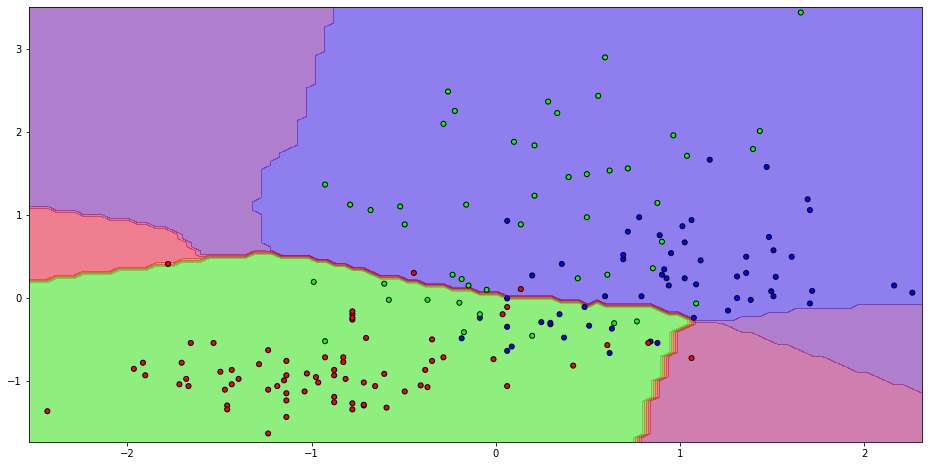

In [49]:
plot_boundary(data, targets, net)

### Otimizando

In [50]:
from torch import optim

In [51]:
alpha = 1e-3

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=alpha) # Stochastic Gradient Descent

#### Hiperparâmetros

- Valores definidos antes do início da aprendizagem
- Devem ser ajustados para cada tarefa específica

Ao definir a arquitetura da rede (quantidade de neurônios e camadas) temos que definir um valor adequado. Essa escolha pode ser empírica, mas no geral é experimental.
- Empírica (Abordagem do Panda): O programador investe seus esforços em um único modelo (um bebê panda), e altera os hiperparâmetros com base na sua experiência e nas observações.
- Experimental: Múltiplos modelos são gerados simultâneamente, com diferentes combinações de hiperparâmetros. Dentre eles, é escolhido o que apresentar melhor performance.

#### Cast dos dados

In [52]:
X = torch.Tensor(data).to(device)
y = torch.LongTensor(targets).to(device)

#### Treinando um modelo

- Forward
    - Alimentar a rede com os dados: `pred = net(X)`
    - Calcular a função de custo: `loss = criterion(pred, y)`
    
    
- Backpropagation
    - Calcular gradiente: `loss.backward()`
    - Atualizar pesos: `optimizer.step()`

In [53]:
pred = net(X)
loss = criterion(pred, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [54]:
loss.backward()
optimizer.step()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

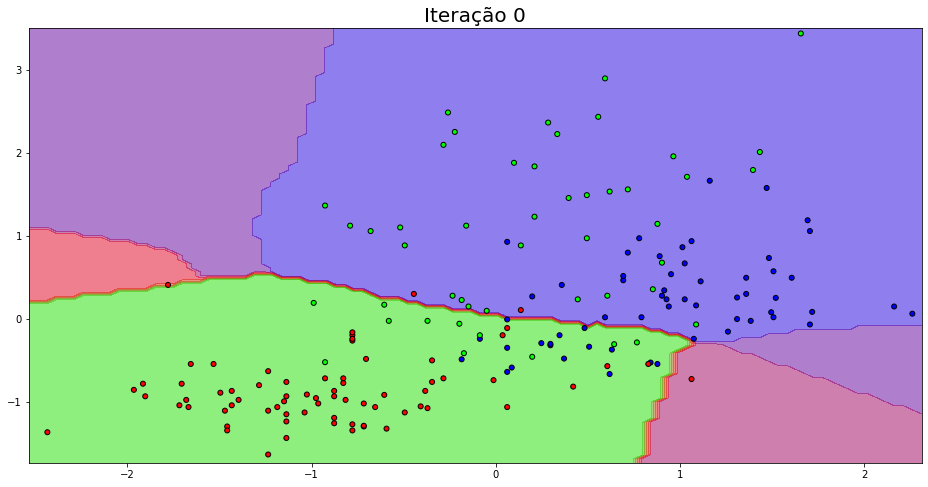

<Figure size 432x288 with 0 Axes>

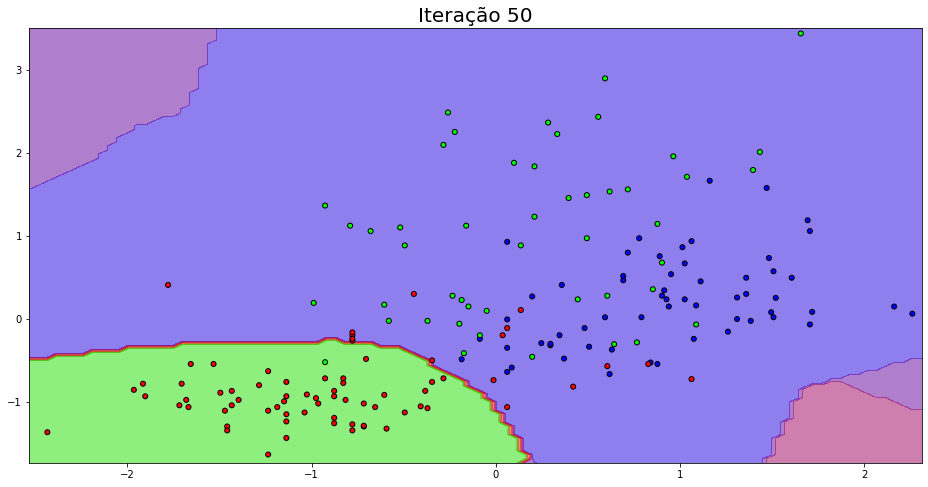

<Figure size 432x288 with 0 Axes>

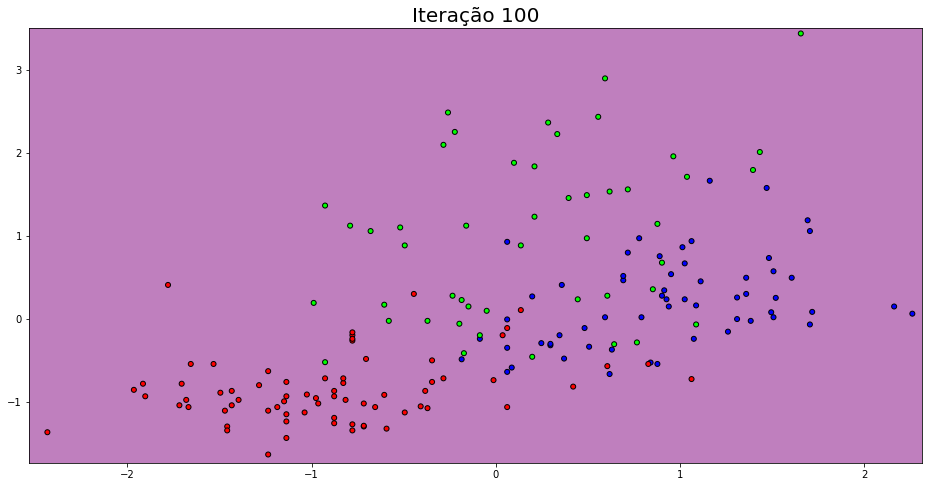

<Figure size 432x288 with 0 Axes>

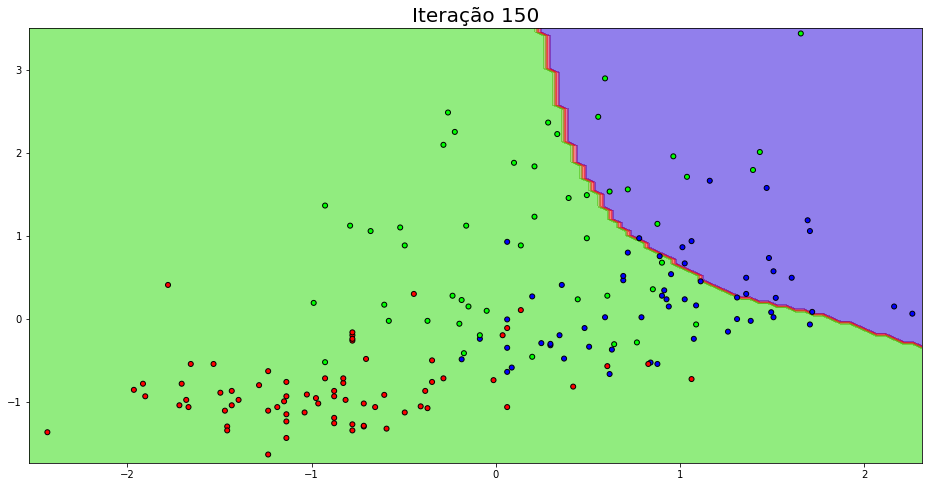

<Figure size 432x288 with 0 Axes>

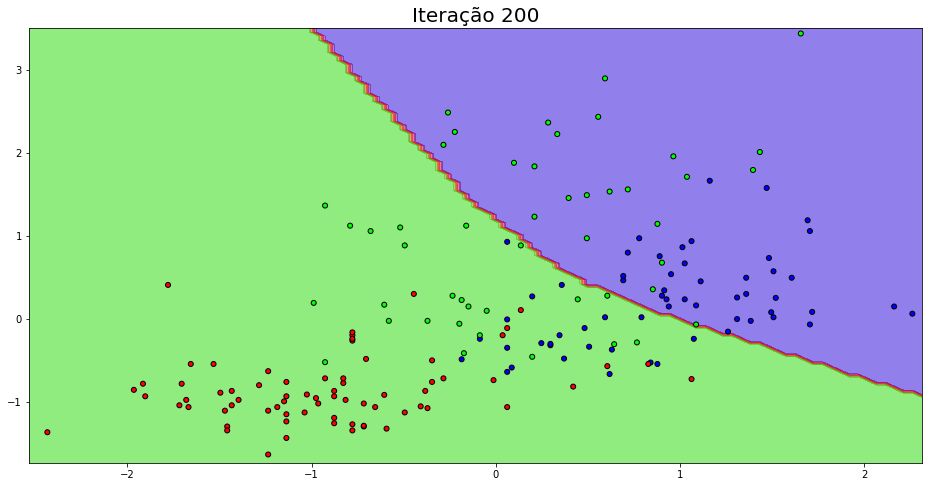

<Figure size 432x288 with 0 Axes>

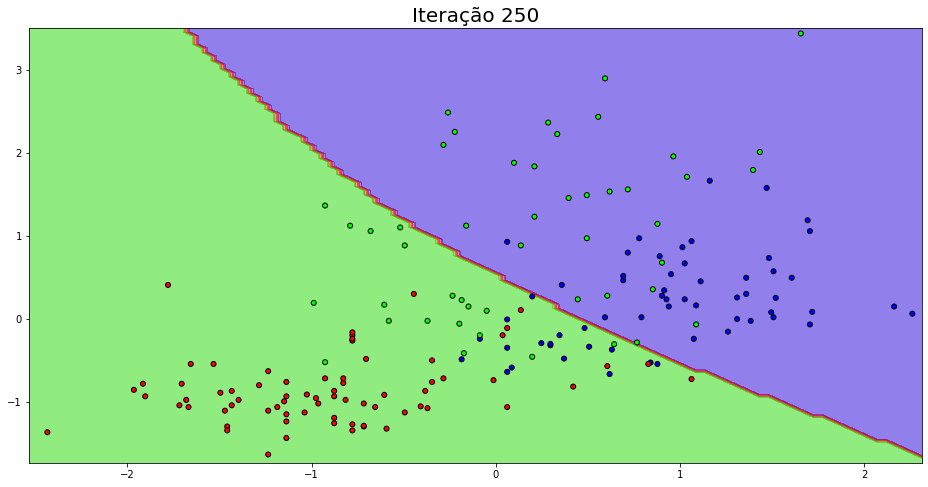

<Figure size 432x288 with 0 Axes>

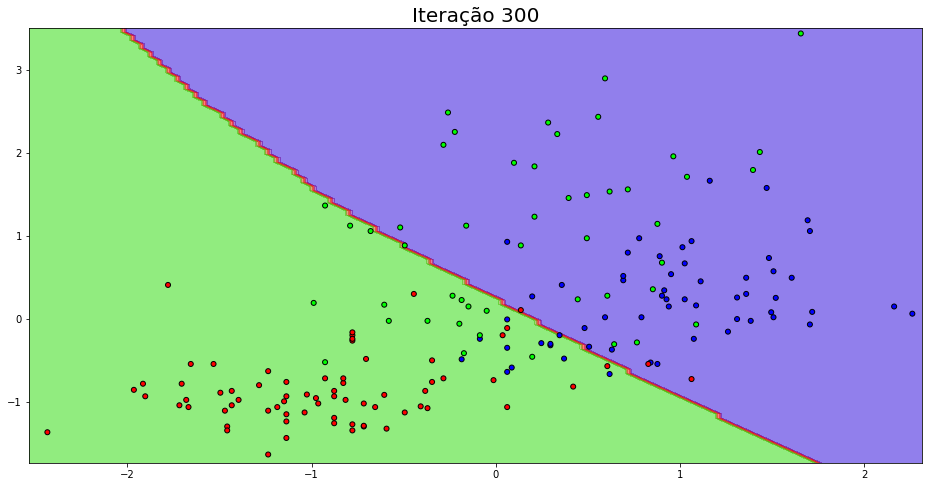

<Figure size 432x288 with 0 Axes>

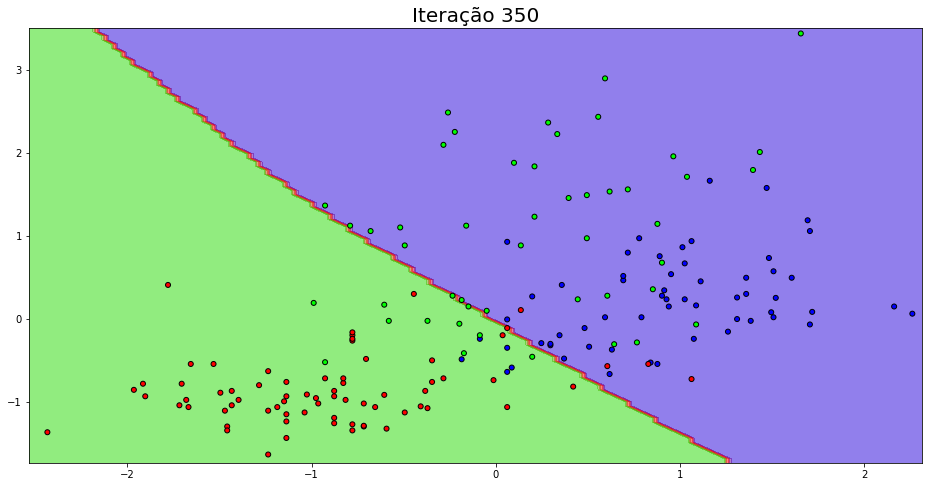

<Figure size 432x288 with 0 Axes>

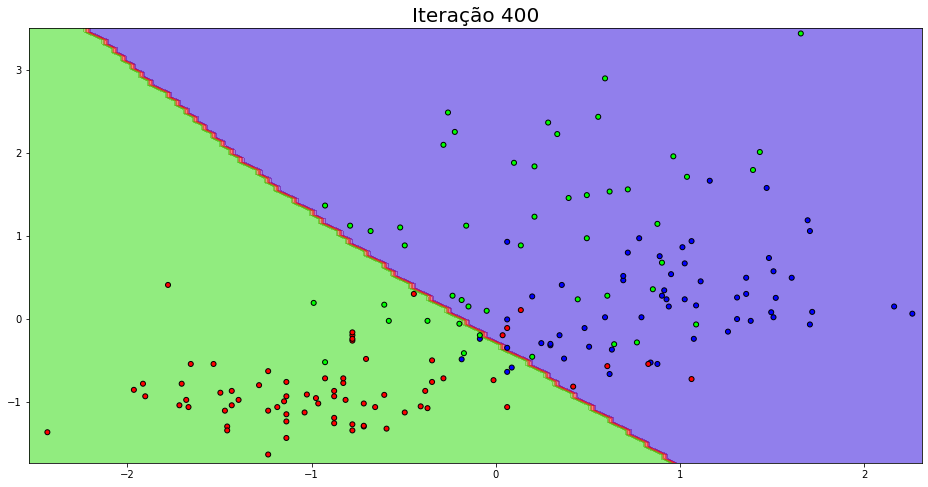

<Figure size 432x288 with 0 Axes>

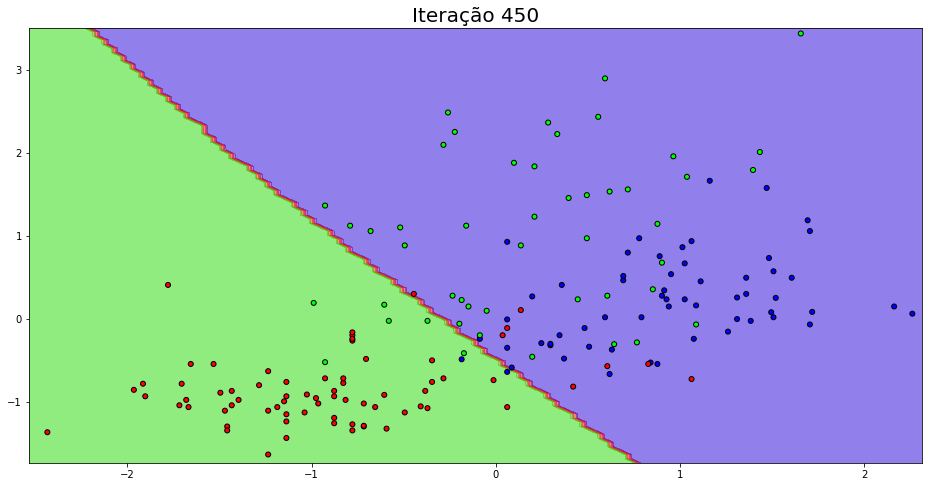

In [55]:
for i in range(500):
    pred = net(X)
    loss = criterion(pred, y)
    
    loss.backward()
    optimizer.step()
    
    if i % 50 == 0:
        plt.figure()

        plot_boundary(data, targets, net, f"Iteração {i}")

# <span style="color: blue">Otimizadores</span>

Existe uma quantidade considerável de <span style="color: blue">Otimizadores</span> e cada um requer um ajuste específico de **hiperparâmetros**

## Gradiente Descendente
É um algoritmo clássico, consiste em subtrair o valor do gradiente $\triangledown f$ dos pesos $W$ da rede
<br>
<br>
<center style="font-size: 26px">
    $W_i = W_i - \alpha \cdot \triangledown f_i$
</center>

Sendo $\alpha$ a **taxa eaprendizagem** que é um multiplicador que controla o tamanho do passo de otimização.

Muito sucetível a mínimos locais.

```python
optimizer = optim.SGD(model.parameters(), lr=0.01)
```

### Gradiente Descendente + Momentum
Considera a "velocidade" dos passos de atualizaação sendo mais robusto a mínimos locais.

```python
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
```

### Gradiente Descendente + Momentum + Nesterov
Se tratando de problemas sismples com soluções simples, podedmos adicionar o Nesterov
```python
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
```

### Weight Decay - taxa de regularização
Penalidade quadrática - regularização

Controla a complexidade do modelo para que o **overfit** não aconteça
```python
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)
```
<br>
<center style="font-size: 26px">
    $Loss = L(f(x, \theta)) + \frac{1}{2} \lambda \theta^2$
</center>

Esse termo adicionado ao cálculo de Loss vai penalizar pesos muito grandes, aumentando a simplicidade do modelo

Ex. Tensorflow: [Link Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.57572&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

# <span style="color: blue">Otimizadores Adaptativos</span>

- ### AdaGrad (Adaptative (Sub)Gradient)
```python
optim.Adagrad(model.parameters(), lr=1e-3, weight_decay=5e-4)
```

- ### AdaDelta
Surge para tentar solucionar os problemas de **underfit** do `AdaGrad`
```python
optim.Adadelta(model.parameters(), lr=1e-3, weight_decay=5e-4)
```

- ### RMSprop (Root Mean Square Propagation)
Conseguiu resolver o problema do `AdaGrad` de **underfit** e conseguiu desempenho melhor que o `AdaDelta`
```python
optim.RMSprop(model.parameters(), lr=1e-3, weight_decay=5e-4, momentum=0.9)
```

- ### Adam
```python
optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)
```

# <span style="color: blue">Hiperparâmetros de Treinamento</span>

- ## <span style="color: blue">Iteração</span>

Uma <span style="color: blue">Iteração</span> é quando todo o seguinte fluxo acontece:
1. Operações com o Input da rede
2. Cálculo da função de perda
3. Cálculo do gradiente
4. Atualização de pesos
5. Retorna ao passo 1

Em outras palavras a <span style="color: blue">Iteração</span> consiste em um passo de otimização (Forward + Backpropagation)

- ## <span style="color: blue">Batch</span>

<span style="color: blue">Batch</span> vai representar a quantidade de amostras em uma <span style="color: blue">Iteração</span>. O tamanho do <span style="color: blue">Batch</span> vai interferir no comportamento de convergência.

Gradiente Descendente com diferentes tamanhos de <span style="color: blue">Batch</span>:
<img src="figures/batch.png" style="width: 700px">

A escolha é um **trade-off**. Apesar do Batch parecer melhor que o Mini-batch pela imagem, ele exigirá mais tempo de treino.

Ex.:

Se temos um dataset com <span style="color: #246314; font-weight: bold">3000 amostras</span>, podemos dividir em <span style="color: #38914C; font-weight: bold">2000 amostras</span> de treino e <span style="color: #8C8C8C; font-weight: bold">1000 amostras</span> de teste:
<img src="figures/batch_train_test.png" style="width: 600px">

Dada a quantidade de amostras de treino, podemos dividir em <span style="color: #38914C; font-weight: bold">batches de tamanho 500</span>, sendo necessárias <span style="color: blue">4 iterações</span> para a rede ver todo o conjunto de treino:
<img src="figures/batch_train.png" style="width: 600px">

Ou até mesmo em <span style="color: #38914C; font-weight: bold">batches de tamanho 200</span>, sendo necessárias <span style="color: blue">10 iterações</span> para a rede ver todo o conjunto de treino:
<img src="figures/batch_train_2.png" style="width: 600px">

O conjunto de todas as iterações para ver todo o conjuto de treino é chamado de <span style="color: blue">Época</span>.

- ## <span style="color: blue">Época</span>

Se ao final de uma <span style="color: blue">época</span> o modelo viu todas as amostras, por que precisamos de mais de uma <span style="color: blue">época</span>?
- O treinamento consiste em um processo iterativo com pequenos ajustes a partir do modelo inicial. Ou seja, a <span style="color: blue">época</span> $n + 1$ tem como ponto de partida o modelo ajustado na <span style="color: blue">época</span> $n$.

No geral o **Gráfico de Convergência** é definido em função das <span style="color: blue">épocas</span>

## Fluxo de Treinamento
```python
# Epochs
for i in range(num_epochs):
    
    # Iterations
    for batch in train_data:
        
        # Forward
        ypred = net(batch)
        loss = criterion(ypred, y)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
```

# No Pytorch

In [56]:
import torch

from torch import nn, optim

## Dicionário de hiperparâmetros

In [57]:
args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'batch_size': 5,
    'num_workers': 4, # quantidade de batchs carregados (num de threads)
    'lr': 1e-6,
    'weight_decay': 5e-6,
    'num_epochs': 30
}

## Datasets

In [58]:
from torchvision import datasets, transforms

In [59]:
train_set = datasets.MNIST(
    root='./dataset',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_set = datasets.MNIST(
    root='./dataset',
    train=False,
    transform=transforms.ToTensor(),
    download=False
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [60]:
len(train_set)

60000

In [61]:
len(test_set)

10000

Cada dataset possui uma implementação específica internamente no pytorch. No entanto, cada item será uma tupla `(dado, rótulo)`

In [62]:
type(train_set)

torchvision.datasets.mnist.MNIST

In [63]:
type(train_set[0])

tuple

In [64]:
train_set[0][0].shape

torch.Size([1, 28, 28])

In [65]:
train_set[0][0][0].shape

torch.Size([28, 28])

### Iterando dataset para observar amostras

In [66]:
import matplotlib.pyplot as plt

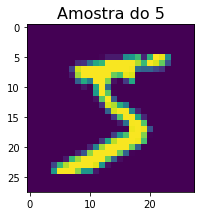

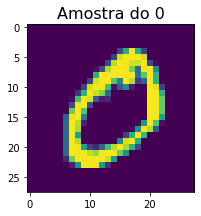

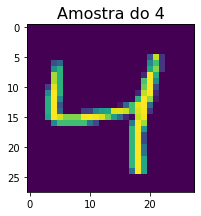

In [67]:
for i in range(3):
    dado, rotulo = train_set[i]
    
    plt.figure(figsize=(3, 4))
    plt.imshow(dado[0])
    plt.title(f"Amostra do {rotulo}", fontsize=16)

Temos um total de 70 mil amostras, mas elas ainda não estão carregadas na memória (seria muito custoso). A vantagem da classe `Dataset` do Pytorch é que as amostras só são carregadas quando necessário. Em resumo, cada vez que indexamos um item do dataset, as seguintes operações são realizadas:
- Amostra lida do arquivo e carregada como tupla `(dado, rótulo)`
- As transformações são aplicadas

### Dataloader

In [68]:
from torch.utils.data import DataLoader

A classe `DataLoader` tem 3 funcionalidades principais:
- Separar dos dados em batches
- Embaralhar os dados
- Carregar batches em paralelo utilizando threads

O uso de threads no carregamento minimiza períodos ociosos de processamento

In [69]:
train_loader = DataLoader(
    dataset=train_set,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=args['num_workers']
)

test_loader = DataLoader(
    dataset=train_set,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=args['num_workers']
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


O objeto retornado é um **iterador**, podendo ser utilizado para iterar em loops mas não suporta indexação.

In [70]:
train_loader

In [71]:
for batch in train_loader:
    dado, rotulo = batch
    
    print(dado.size(), rotulo.size())
    
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([5, 1, 28, 28]) torch.Size([5])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


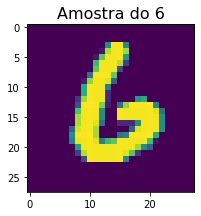

In [72]:
for batch in train_loader:
    dado, rotulo = batch
    
    plt.figure(figsize=(3, 4))
    plt.imshow(dado[0][0])
    plt.title(f"Amostra do {rotulo[0]}", fontsize=16)
    
    break

## Implementando MLP

In [73]:
class MNIST_Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MNIST_Classifier, self).__init__()
        
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )
        self.out      = nn.Linear(hidden_size, output_size)
        self.softmax  = nn.Softmax()
    
    def forward(self, X):
        X = X.view(X.size(0), -1) # Mantém a primeira dimensão mas lineariza o resto
        
        feature = self.features(X)
        output  = self.softmax(self.out(feature))
        
        return output

In [74]:
train_set[0][0].shape

torch.Size([1, 28, 28])

In [75]:
train_set.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [76]:
input_size  = 28 * 28
hidden_size = 128
output_size = 10

net = MNIST_Classifier(input_size, hidden_size, output_size).to(args['device'])

net

MNIST_Classifier(
  (features): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (out): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [77]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

## Implementando fluxo

In [78]:
for epoch in range(args['num_epochs']):
    
    epoch_loss = []
    
    for batch in train_loader:
        
        dado, rotulo = batch
        
        # Cast
        dado = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])
        
        # Forward
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)
        
        # Backward
        loss.backward()
        optimizer.step()
        
    epoch_loss = np.array(epoch_loss)
    
    mean = epoch_loss.mean()
    std = epoch_loss.std()
    
    print(f"Época {epoch + 1} ==> Loss: {mean:.4f} +/- {std:.4f}")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Época 1 ==> Loss: 2.2048 +/- 0.1083
Época 2 ==> Loss: 1.9312 +/- 0.1695
Época 3 ==> Loss: 1.7490 +/- 0.1597
Época 4 ==> Loss: 1.6821 +/- 0.1631
Época 5 ==> Loss: 1.6562 +/- 0.1652
Época 6 ==> Loss: 1.6439 +/- 0.1659
Época 7 ==> Loss: 1.6373 +/- 0.1659
Época 8 ==> Loss: 1.6333 +/- 0.1652
Época 9 ==> Loss: 1.6299 +/- 0.1654
Época 10 ==> Loss: 1.6276 +/- 0.1635
Época 11 ==> Loss: 1.6253 +/- 0.1641
Época 12 ==> Loss: 1.6237 +/- 0.1644
Época 13 ==> Loss: 1.6225 +/- 0.1621
Época 14 ==> Loss: 1.6214 +/- 0.1633
Época 15 ==> Loss: 1.6207 +/- 0.1634
Época 16 ==> Loss: 1.6198 +/- 0.1623
Época 17 ==> Loss: 1.6197 +/- 0.1615
Época 18 ==> Loss: 1.6190 +/- 0.1621
Época 19 ==> Loss: 1.6191 +/- 0.1623
Época 20 ==> Loss: 1.6179 +/- 0.1639
Época 21 ==> Loss: 1.6184 +/- 0.1626
Época 22 ==> Loss: 1.6170 +/- 0.1621
Época 23 ==> Loss: 1.6166 +/- 0.1614
Época 24 ==> Loss: 1.6163 +/- 0.1620
Época 25 ==> Loss: 1.6180 +/- 0.1635
Época 26 ==> Loss: 1.6178 +/- 0.1627
Época 27 ==> Loss: 1.6163 +/- 0.1625
Época 28 =

# Datasets Customizados

In [79]:
import torch
from torch import nn, optim

from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'batch_size': 5,
    'num_workers': 4, # quantidade de batchs carregados (num de threads)
    'lr': 1e-6,
    'weight_decay': 5e-6,
    'num_epochs': 200
}

`Dataset` permite que implementemos nosso próprio dataset interpretável pelo Pytorch

In [81]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
! unzip Bike-Sharing-Dataset.zip  

--2022-07-04 03:11:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  --.-KB/s    in 0.04s   

2022-07-04 03:11:13 (6.05 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [82]:
df = pd.read_csv('hour.csv')

In [83]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Informações do dataset bike sharing
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [84]:
torch.manual_seed(1)
indices    = torch.randperm(len(df)).tolist()

train_size = int(0.8 * len(df))
df_train   = df.iloc[indices[:train_size]]
df_test    = df.iloc[indices[train_size:]]

df_train.to_csv('bike_train.csv', index=False)
df_test.to_csv('bike_test.csv', index=False)

## Classe `Dataset`

Permite implementar o próprio dataset reescrevendo os métodos:
- `__init__(self)`: Define a lista de amostras do dataset
- `__getitem__(self, idx)`: Carrega uma amostra, aplica as devidas transformações e retorna uma tupla `(dado, rótulo)`
- `__len__(self)`: Retorna a quantidade de amostras do dataset

In [85]:
class BikeDataset(Dataset):
    def __init__(self, csv_path):
        self.dados = pd.read_csv(csv_path).to_numpy()
        
    def __getitem__(self, idx):
        sample = self.dados[idx][2:14]
        label  = self.dados[idx][-1:]
        
        sample = torch.from_numpy(sample.astype(np.float32))
        label  = torch.from_numpy(label.astype(np.float32))
        
        return sample, label
    
    def __len__(self):
        return len(self.dados)

In [86]:
train_set = BikeDataset('bike_train.csv')
test_set = BikeDataset('bike_test.csv')

In [87]:
dado, rotulo = train_set[0]

In [88]:
dado

tensor([ 4.0000,  1.0000, 11.0000, 19.0000,  0.0000,  4.0000,  1.0000,  1.0000,
         0.3800,  0.3939,  0.2700,  0.3582])

In [89]:
rotulo

tensor([373.])

## Construindo `Dataloader`

In [90]:
train_loader = DataLoader(
    dataset=train_set,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=args['num_workers']
)

test_loader = DataLoader(
    dataset=train_set,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=args['num_workers']
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Implementando MLP

In [91]:
class Bike_Regressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Bike_Regressor, self).__init__()
        
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )
        self.out      = nn.Linear(hidden_size, output_size)
    
    def forward(self, X):
        feature = self.features(X)
        output  = self.out(feature)
        
        return output

In [92]:
input_size  = len(train_set[0][0])
hidden_size = 128
output_size = 1

net = Bike_Regressor(input_size, hidden_size, output_size).to(args['device'])

In [93]:
net

Bike_Regressor(
  (features): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (out): Linear(in_features=128, out_features=1, bias=True)
)

In [94]:
criterion = nn.L1Loss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [95]:
def train(train_loader, net, epoch):
    net.train()
    
    epoch_loss = []

    for batch in train_loader:

        dado, rotulo = batch

        # Cast
        dado = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])

        # Forward
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        # Backward
        loss.backward()
        optimizer.step()

    epoch_loss = np.array(epoch_loss)

    mean = epoch_loss.mean()
    std = epoch_loss.std()

    print(f"Época {epoch + 1} ==> Loss: {mean:.4f} +/- {std:.4f}")

    return epoch_loss.mean()

In [96]:
def test(test_loader, net, epoch):
    net.eval()
    
    with torch.no_grad():
        epoch_loss = []

        for batch in test_loader:

            dado, rotulo = batch

            # Cast
            dado = dado.to(args['device'])
            rotulo = rotulo.to(args['device'])

            # Forward
            pred = net(dado)
            loss = criterion(pred, rotulo)
            epoch_loss.append(loss.cpu().data)

    epoch_loss = np.array(epoch_loss)

    mean = epoch_loss.mean()
    std = epoch_loss.std()

    print(f"Época {epoch + 1} ==> Loss: {mean:.4f} +/- {std:.4f}")

    return epoch_loss.mean()

In [97]:
train_losses, test_losses = [], []

for epoch in range(args['num_epochs']):
    train_losses.append(train(train_loader, net, epoch))
    test_losses.append(test(test_loader, net, epoch))
    print('='*40)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Época 1 ==> Loss: 189.2536 +/- 80.5306
Época 1 ==> Loss: 188.3775 +/- 80.9758
Época 2 ==> Loss: 187.4150 +/- 82.0909
Época 2 ==> Loss: 186.4583 +/- 82.5189
Época 3 ==> Loss: 185.4955 +/- 81.1101
Época 3 ==> Loss: 184.4408 +/- 81.1172
Época 4 ==> Loss: 183.3628 +/- 81.7827
Época 4 ==> Loss: 182.2723 +/- 80.9457
Época 5 ==> Loss: 181.1762 +/- 81.0820
Época 5 ==> Loss: 180.0011 +/- 81.4454
Época 6 ==> Loss: 178.8035 +/- 80.9204
Época 6 ==> Loss: 177.5657 +/- 80.6764
Época 7 ==> Loss: 176.2307 +/- 80.1902
Época 7 ==> Loss: 174.8963 +/- 79.5261
Época 8 ==> Loss: 173.4693 +/- 80.1319
Época 8 ==> Loss: 172.0162 +/- 78.7378
Época 9 ==> Loss: 170.5453 +/- 81.6066
Época 9 ==> Loss: 168.9754 +/- 79.1566
Época 10 ==> Loss: 167.3607 +/- 79.7652
Época 10 ==> Loss: 165.7742 +/- 78.6107
Época 11 ==> Loss: 164.0896 +/- 78.4013
Época 11 ==> Loss: 162.3783 +/- 80.1809
Época 12 ==> Loss: 160.6579 +/- 77.4987
Época 12 ==> Loss: 158.8728 +/- 77.5929
Época 13 ==> Loss: 157.0534 +/- 77.9221
Época 13 ==> Loss:

# Gráfico de convergência

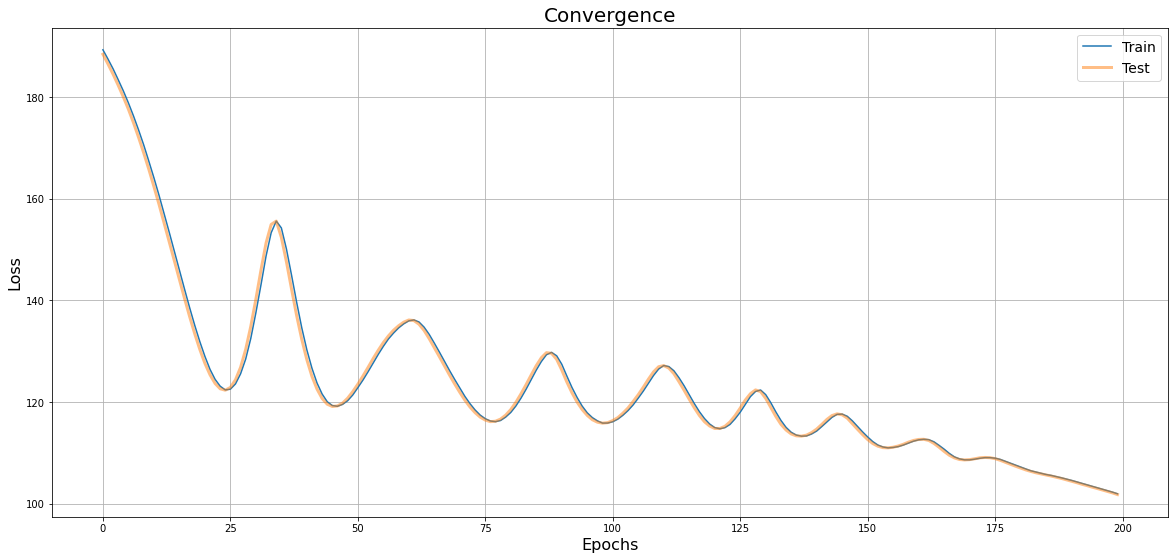

In [98]:
plt.figure(figsize=(20, 9))

plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test', linewidth=3, alpha=0.5)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convergence', fontsize=20)

plt.legend(fontsize=14)

plt.grid()
plt.show()